# LandCover AI dataset: Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [ ]:
from aitlas.datasets import LandCoverAiDataset
from aitlas.models import Unet
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTranspose

## Visualize images and masks

Total number of patches: 7470


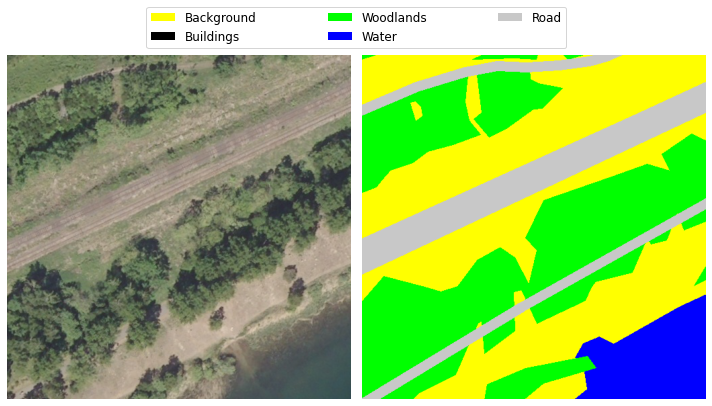

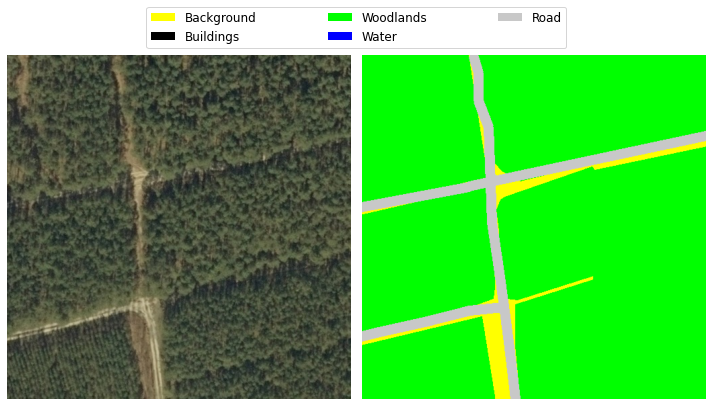

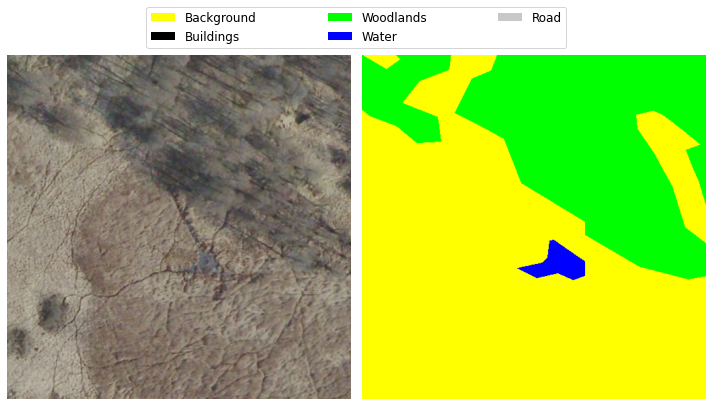

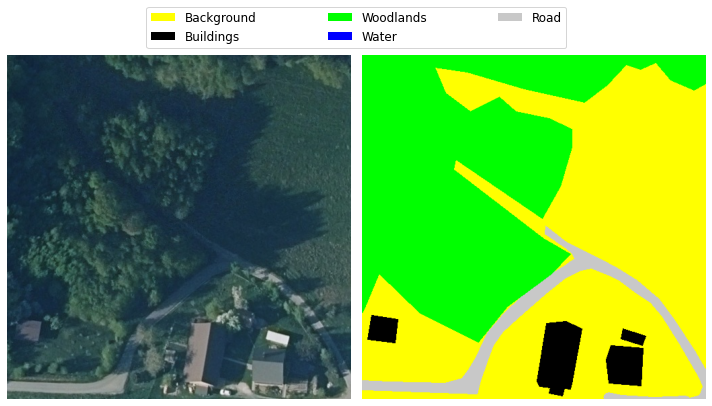

In [3]:
dataset_config = {
    "data_dir": "../data/landcoverai/output",
    "csv_file": "../data/landcoverai/train.txt"
}
dataset = LandCoverAiDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(2000);
dataset.show_image(875);
dataset.show_image(7000);
dataset.show_image(4000);

In [3]:
dataset.data_distribution_table()

,Number of pixels
Background,1.134440e+09
Buildings,1.676724e+07
Woodlands,6.487147e+08
Water,1.265083e+08
Road,3.178538e+07


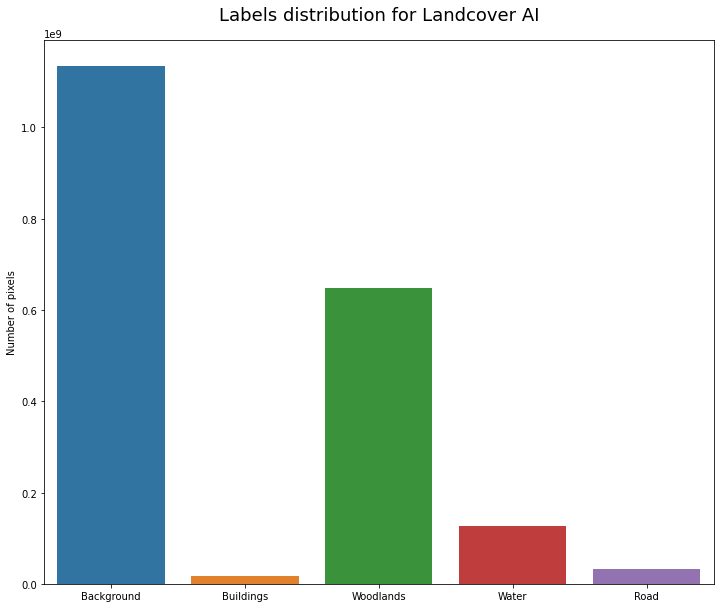

In [4]:
dataset.data_distribution_barchart();

## Load train data

In [5]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "csv_file": "../data/landcoverai/train.txt",
    "data_dir": "../data/landcoverai/output",
    "joint_transforms": ["aitlas.transforms.FlipHVRandomRotate"],
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = LandCoverAiDataset(train_dataset_config)

validation_dataset_config = {
    "batch_size": 16,
    "shuffle": False,
    "csv_file": "../data/landcoverai/val.txt",
    "data_dir": "../data/landcoverai/output",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
validation_dataset = LandCoverAiDataset(validation_dataset_config)
len(train_dataset), len(validation_dataset)

(7470, 1602)

## Create the model

In [6]:
epochs = 20
model_directory = "./experiments/landcoverai"
model_config = {
    "num_classes": 5, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = Unet(model_config)
model.prepare()

## Start the training

In [ ]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    val_dataset=validation_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

## Evalute the model using test data

In [13]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "data_dir": "../data/landcoverai/output",
    "csv_file": "../data/landcoverai/test.txt",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = LandCoverAiDataset(test_dataset_config)
len(test_dataset)

model = Unet(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "./experiments/landcoverai/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2022-10-30 21:16:14,989 INFO Loading checkpoint ./experiments/landcoverai/checkpoint.pth.tar
2022-10-30 21:16:15,288 INFO Loaded checkpoint ./experiments/landcoverai/checkpoint.pth.tar at epoch 21
testing on test set: 100%|████████████████████████████████████████████████████████████| 401/401 [00:11<00:00, 34.28it/s]


[{'IOU': 0.9114360977667845,
  'IOU mean': 0.828794907732855,
  'IOU per Class': array([0.92565326, 0.75841971, 0.90626119, 0.92866128, 0.62497911])}]

## Predictions

2022-10-30 21:19:33,897 INFO Loading checkpoint ./experiments/landcoverai/checkpoint.pth.tar
2022-10-30 21:19:34,242 INFO Loaded checkpoint ./experiments/landcoverai/checkpoint.pth.tar at epoch 21


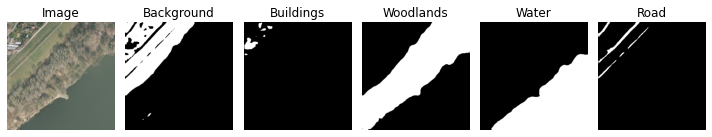

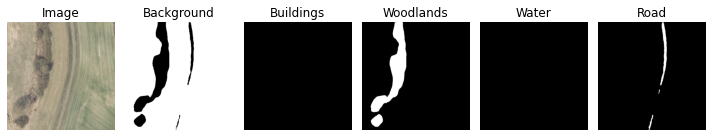

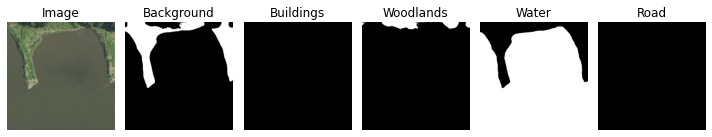

In [14]:
model_path = "./experiments/landcoverai/checkpoint.pth.tar"
#labels = LandCoverAiDataset.labels
labels = ["Background", "Buildings", "Woodlands", "Water", "Road"]
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('../data/landcoverai/output/N-34-97-C-b-1-2_61.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/landcoverai/output/M-33-48-A-c-4-4_49.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/landcoverai/output/N-33-139-C-d-2-2_159.jpg')
fig = model.predict_masks(image, labels, transform)